<a href="https://colab.research.google.com/github/Kushanabha/EDA-Startup-Funding/blob/main/Kushanabha_EDA_StartupFunding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis: Indian Startup Funding


## 🔍 Objective
Perform a comprehensive exploratory data analysis (EDA) on the Indian startup funding dataset to uncover patterns and insights.


In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('seaborn')
%matplotlib inline


In [ ]:
# 📁 Upload Dataset
from google.colab import files
uploaded = files.upload()


Saving startup_funding.csv to startup_funding (5).csv


In [ ]:
# Load dataset
df = pd.read_csv('startup_funding.csv')
df.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df.rename(columns={'city__location': 'city'}, inplace=True)

In [ ]:
# Clean amount_in_usd column (remove commas, non-numeric values)
df['amount_in_usd'] = df['amount_in_usd'].replace('[\$,]', '', regex=True)  # Remove $, commas if present
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')   # Convert to numeric, NaN if invalid

# Drop rows where amount couldn't be converted
df = df.dropna(subset=['amount_in_usd'])

# Optional: Reset index
df.reset_index(drop=True, inplace=True)



In [ ]:
# 🔍 Basic Stats
df.describe(include='all')


,sr_no,date_dd/mm/yyyy,startup_name,industry_vertical,subvertical,city,investors_name,investmentntype,amount_in_usd,remarks
count,2065.000000,2065,2065,1934,1418,1930,2045,2062,2.065000e+03,337
unique,NaN,932,1696,583,1309,86,1658,49,NaN,50
top,NaN,02/02/2015,Swiggy,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,NaN,Series A
freq,NaN,10,8,589,11,456,29,1066,NaN,150
mean,1474.245036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.842990e+07,NaN
std,927.541506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.213734e+08,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN
25%,619.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700000e+05,NaN
50%,1441.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+06,NaN
75%,2313.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+06,NaN


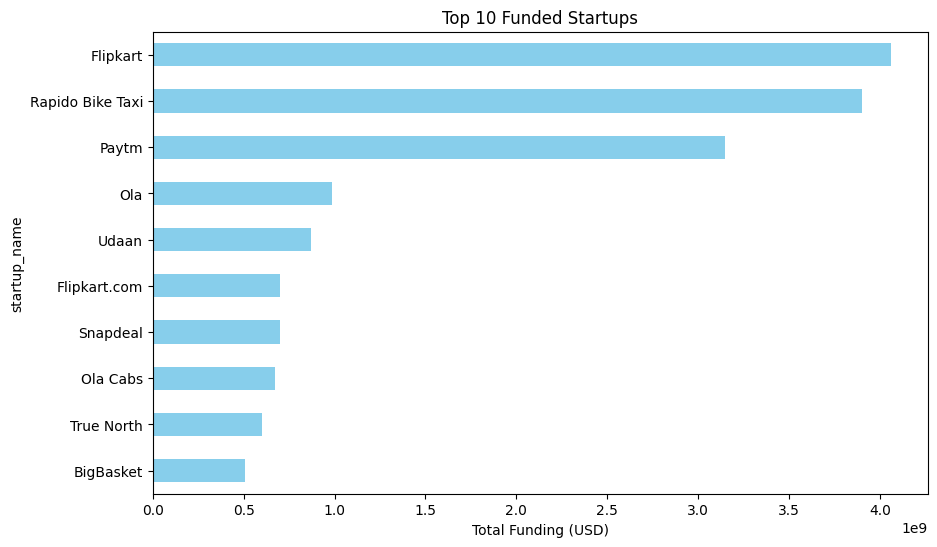

In [ ]:
# 📈 Top Funded Startups
top_startups = df.groupby('startup_name')['amount_in_usd'].sum().sort_values(ascending=False).head(10)
top_startups.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Total Funding (USD)')
plt.title('Top 10 Funded Startups')
plt.gca().invert_yaxis()
plt.show()


/tmp/ipython-input-102-3795160499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


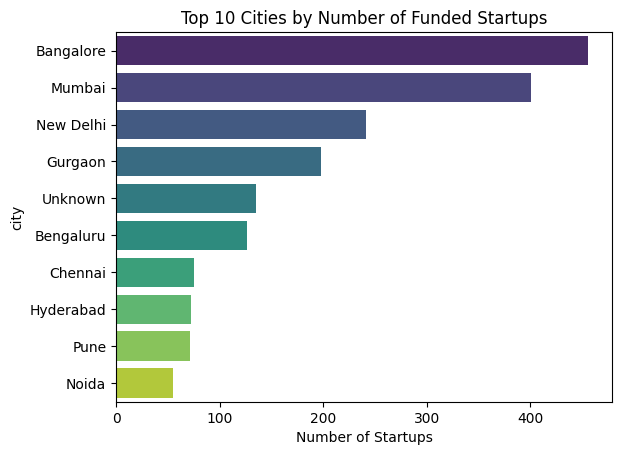

In [ ]:
# 🏙️ Funding by City
df['city'] = df['city'].fillna('Unknown')
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Number of Funded Startups')
plt.xlabel('Number of Startups')
plt.show()


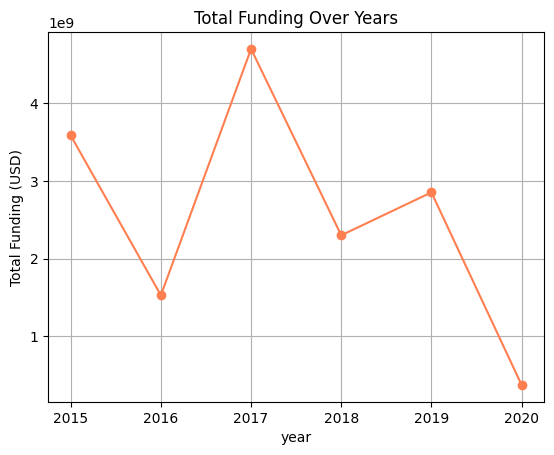

In [ ]:
# 📆 Funding Over Time
df['date_dd/mm/yyyy'] = pd.to_datetime(df['date_dd/mm/yyyy'], errors='coerce')
df['year'] = df['date_dd/mm/yyyy'].dt.year
yearly_funding = df.groupby('year')['amount_in_usd'].sum()
yearly_funding.plot(kind='line', marker='o', color='coral')
plt.title('Total Funding Over Years')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()

## ✅ Summary of Insights


- The top-funded startups are mainly from the fintech and e-commerce sectors.
- Bangalore, Delhi, and Mumbai are the leading cities for startup funding.
- There is a noticeable increase in funding activity after 2015, with peaks in certain years.


### 📝 Author

Kushanabha Podder (GitHub: `Kushanabha`)